In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import pandas as pd

# generate a dataset and an equation

## Function to generate inputs and stack them in an array

In [2]:


#generate inputs and stack them into one array
def generate_random_inputs_and_targets(observations):
    xs = np.random.uniform(-10,10,size =(observations,1))
    zs = np.random.uniform(-10,10,size =(observations,1))
    generated_inputs = np.column_stack((xs,zs))

    #generate some noise/error for the objective function
    noise = np.random.uniform(-1,-1,size = (observations,1))

    #objective function
    generated_target = 2*xs + 3*zs + 5 + noise

    #save all this to an external fine. 
    #Tensorflow uses the .npz format.

    np.savez('TF_intro_from_ex2',inputs = generated_inputs, targets = generated_target)



In [3]:
#load the data
training = np.load('TF_intro_from_ex2.npz')


## Function to set model

In [4]:
#define function for model to be used

#assign model to variable. Sequential
#tf.keras.layers.Dense describe output size of 1
def model_set(input_size,output_size):
    

    model = tf.keras.Sequential(
                                [tf.keras.layers.Dense(output_size)]
                                )
    #describe what rules model will use to fit values
    #gradient descent = optimization algorithm
    
    model.compile(optimizer = 'sgd',loss = 'mean_squared_error')
    
    return model

#Estimators can be constructed without optimization when you have some framework 
#which lets you analytically derive, rather than search for, your estimator.
#German Tank Problem

#you'd call it an optimisation problem if the best known approach 
#is to search for a solution, rather than calculate a solution.






## Function for Fitting the Model

In [5]:
#define function for fitting the model.

def model_fit(model,input_data,target_data,epoch,vbose):

    #important to specify x = input_data and so on.
    history = model.fit(x = input_data,y = target_data, epochs = epoch,verbose = vbose)
    
    trained_weight = model.get_weights()[0]
    trained_bias = model.get_weights()[1]
    
    epoch_ops = history.epoch
    
    hist = pd.DataFrame(history.history)
    
    

    return trained_weight, trained_bias,epoch_ops

print("Defined create_model and train_model")

Defined create_model and train_model


# Executing Model

In [6]:
#data for dataset generation
observations = 1000


#data for creating model
input_size = 2
output_size = 1

#data for fitting model
input_dataa = training['inputs']
target_dataa = training['targets']
epochss = 100
verboses = 2

#generate data
generate_random_inputs_and_targets(1000)

#create model
apply = model_set(input_size,output_size)

#fit model
apply_fit = model_fit(apply,input_dataa,target_dataa,epochss,verboses)




Epoch 1/100
32/32 - 0s - loss: 38.5609
Epoch 2/100
32/32 - 0s - loss: 2.7827
Epoch 3/100
32/32 - 0s - loss: 0.7525
Epoch 4/100
32/32 - 0s - loss: 0.2141
Epoch 5/100
32/32 - 0s - loss: 0.0597
Epoch 6/100
32/32 - 0s - loss: 0.0158
Epoch 7/100
32/32 - 0s - loss: 0.0044
Epoch 8/100
32/32 - 0s - loss: 0.0012
Epoch 9/100
32/32 - 0s - loss: 3.2432e-04
Epoch 10/100
32/32 - 0s - loss: 9.0852e-05
Epoch 11/100
32/32 - 0s - loss: 2.4892e-05
Epoch 12/100
32/32 - 0s - loss: 6.8821e-06
Epoch 13/100
32/32 - 0s - loss: 1.8948e-06
Epoch 14/100
32/32 - 0s - loss: 5.2508e-07
Epoch 15/100
32/32 - 0s - loss: 1.4577e-07
Epoch 16/100
32/32 - 0s - loss: 3.8687e-08
Epoch 17/100
32/32 - 0s - loss: 1.0435e-08
Epoch 18/100
32/32 - 0s - loss: 2.8644e-09
Epoch 19/100
32/32 - 0s - loss: 7.7569e-10
Epoch 20/100
32/32 - 0s - loss: 2.2407e-10
Epoch 21/100
32/32 - 0s - loss: 5.9749e-11
Epoch 22/100
32/32 - 0s - loss: 3.0193e-11
Epoch 23/100
32/32 - 0s - loss: 2.8372e-11
Epoch 24/100
32/32 - 0s - loss: 2.2752e-11
Epoch 25

## Extract weights and biases from Model

In [11]:
weight = apply.get_weights()[0]
weight

array([[1.9999999],
       [3.0000002]], dtype=float32)

In [12]:
bias = apply.get_weights()[1]
bias

array([3.9999952], dtype=float32)

## Predict on new data and Plot

In [21]:
def predict_then_plot(model,input_data,target_data):
    
    prediction = apply.predict_on_batch(input_data)
    targets = target_data
    
    plt.xlabel('outputs')
    plt.ylabel('targets')
    plt.plot(np.squeeze(prediction),np.squeeze(targets))
    plt.show
    
    

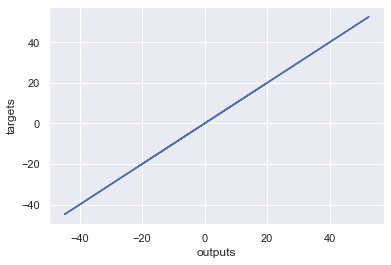

In [22]:
#model = apply
#input_dataa = training['inputs']
#target_dataa = training['targets']

predict_then_plot(apply,input_dataa,target_dataa)
